Data generate with the boundary y = a * x**2 + x

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def generate_data(n_points=500, a=0.5, imbalance=False, seed=60):

    #random seed for reproducibility
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]

    # the decision boundary defined by a equation which forms a parabola
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)

    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]
    return X, labels

Data Plotting and Decision Boundary

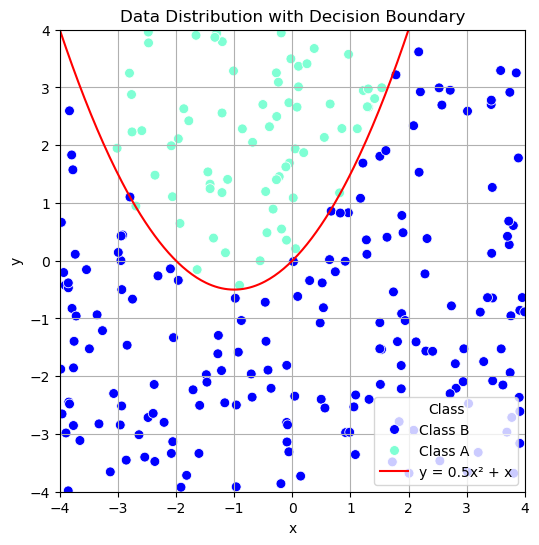

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot the data distribution with the decision boundary 
def plot_data(X, y, a, title="Data Distribution with Decision Boundary"):
    
    plt.figure(figsize=(6, 6))

    # labelled class 0 as B and 1 as Class A
    class_names = {0: "Class B", 1: "Class A"}

    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=[class_names[i] for i in y],
        palette={"Class B": "blue", "Class A": "aquamarine"},
        s=50
    )

    # decision boundary curve 
    # feature space defining 
    x_curve = np.linspace(-4, 4, 300)
    y_curve = a * x_curve**2 + x_curve
    plt.plot(x_curve, y_curve, label=f"y = {a}x² + x", color='red')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

# plotting visualization of the generated data with 250 n points 
# a is the curvature parameter which is set to be 0.5 
X, y = generate_data(n_points=250, a=0.5, imbalance=False, seed=60)
plot_data(X, y, a=0.5)


Logistic Regression Modelling

In [4]:
# importing all the necesssary packages and libraries for the task
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# splitting the data in train and text for both x and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# logostic regresiion is an linear modelling technic so we added polynomial deatures with degree 2
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression(max_iter=1000)  # safer for convergence
)
model.fit(X_train, y_train)

# predicting on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.96


Confusion Matrix for Logistic Regression

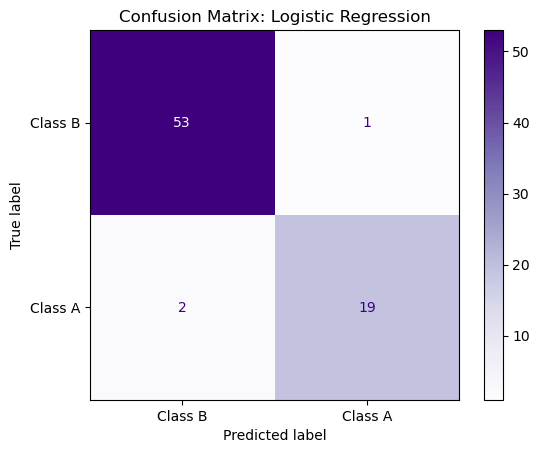

In [5]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class B", "Class A"])
disp.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()

Visualising the Decision Boundary of Logistic Regression

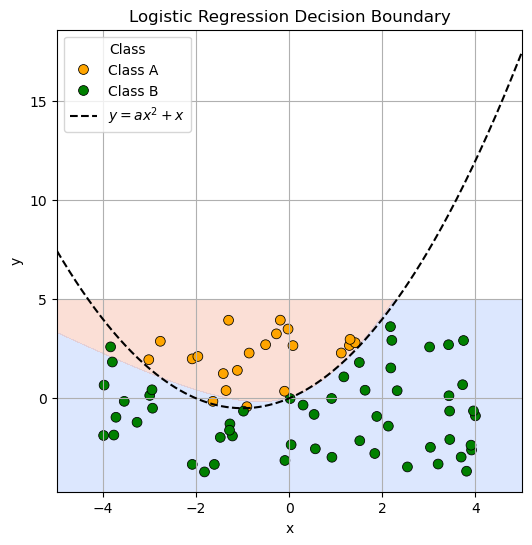

In [6]:
def plot_logistic_decision_boundary(model, X, y, a=None, title="Logistic Regression Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)

    class_names = {0: "Class B", 1: "Class A"}
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        hue=[class_names[i] for i in y],
        palette={"Class B": "green", "Class A": "orange"},
        edgecolor='k', s=50
    )

    if a is not None:
        x_vals = np.linspace(x_min, x_max, 300)
        y_curve = a * x_vals**2 + x_vals
        plt.plot(x_vals, y_curve, '--k', label=r"$y = ax^2 + x$")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()
    
plot_logistic_decision_boundary(model, X_test, y_test, a=0.5)


Varying the Curvature Parameter a

a = 0.0 Accuracy = 0.987


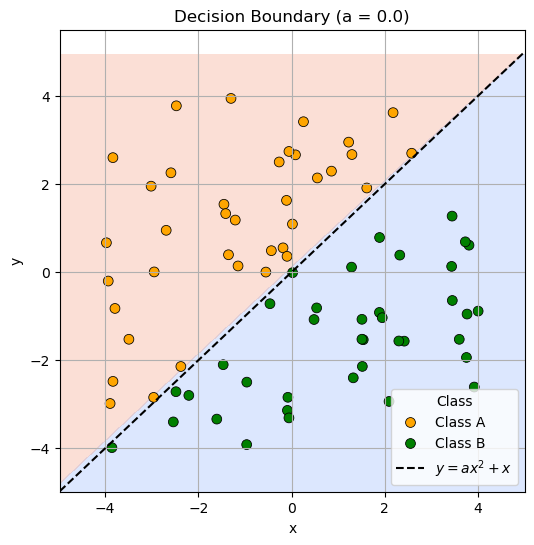

a = 0.2 Accuracy = 0.960


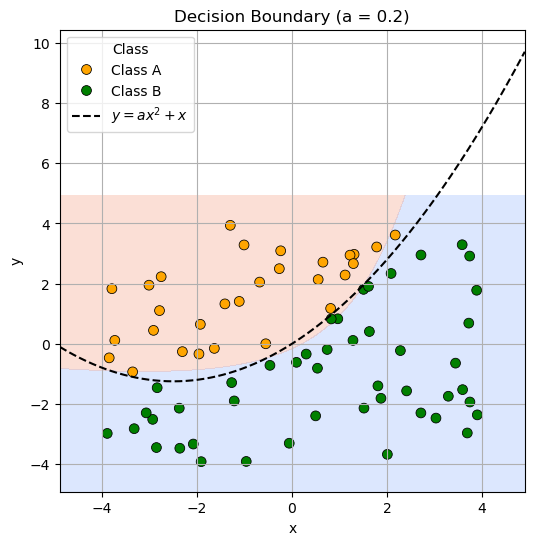

a = 0.5 Accuracy = 0.960


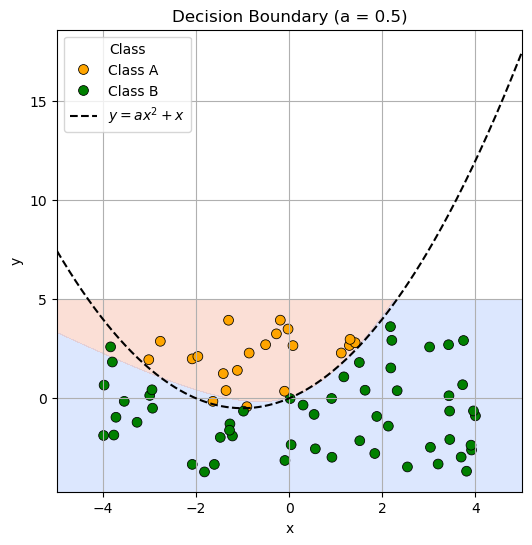

a = 1.0 Accuracy = 0.987


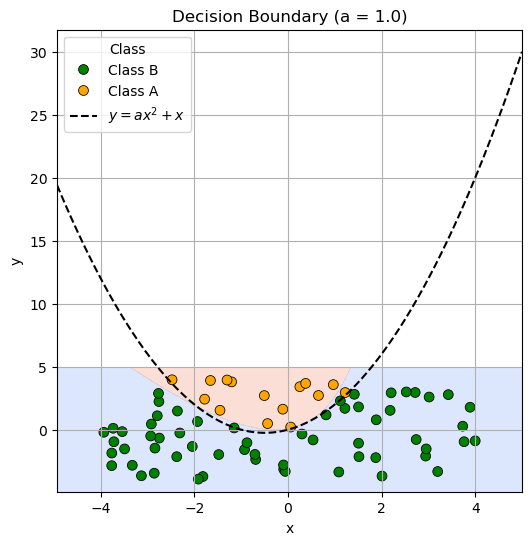

a = 2.0 Accuracy = 0.987


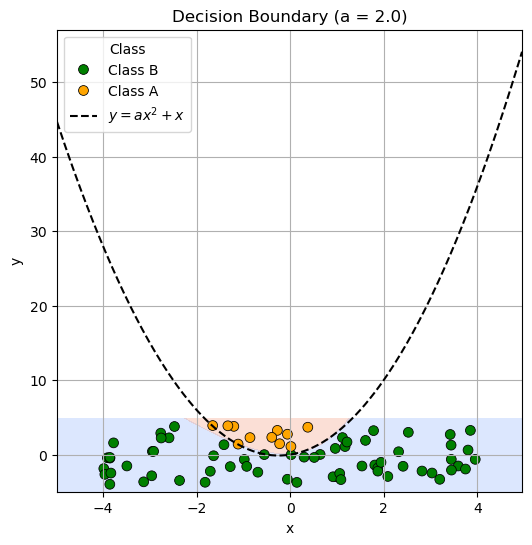

In [9]:
a_values = [0.0, 0.2, 0.5, 1.0, 2.0]
accuracies = []

for a in a_values:
    X, y = generate_data(n_points=250, a=a, imbalance=False, seed=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    
    model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"a = {a:.1f} Accuracy = {acc:.3f}")
    plot_logistic_decision_boundary(model, X_test, y_test, a=a, title=f"Decision Boundary (a = {a})")


Evaluating Logistic Regression in Realistic scenarios

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

def generate_data_with_noise(n_points=500, a=0.5, imbalance=False, add_noise=False, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    if add_noise:
        X += np.random.normal(0, 0.3, X.shape)
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]
    return X, labels

results = []
a = 0.5
n_points_list = [250, 500, 1000]
imbalance_options = [False, True]
noise_options = [False, True]

for n_points in n_points_list:
    for imbalance in imbalance_options:
        for add_noise in noise_options:
            X, y = generate_data_with_noise(n_points=n_points, a=a, imbalance=imbalance, add_noise=add_noise, seed=60)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
            model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
            results.append({
                "n_points": n_points,
                "imbalance": imbalance,
                "noise": add_noise,
                "accuracy": acc,
                "true_negatives": cm[0, 0],
                "false_positives": cm[0, 1],
                "false_negatives": cm[1, 0],
                "true_positives": cm[1, 1]
            })

df_results = pd.DataFrame(results)
from IPython.display import display
display(df_results)

,n_points,imbalance,noise,accuracy,true_negatives,false_positives,false_negatives,true_positives
0,250,False,False,0.960000,53,1,2,19
1,250,False,True,0.960000,53,1,2,19
2,250,True,False,0.967213,53,1,1,6
3,250,True,True,0.983607,54,0,1,6
4,500,False,False,0.993333,108,0,1,41
5,500,False,True,0.986667,107,1,1,41
6,500,True,False,0.983607,108,0,2,12
7,500,True,True,0.991803,107,1,0,14
8,1000,False,False,0.986667,214,3,1,82
9,1000,False,True,0.990000,216,1,2,81


Single Layer Perceptron Mdodelling

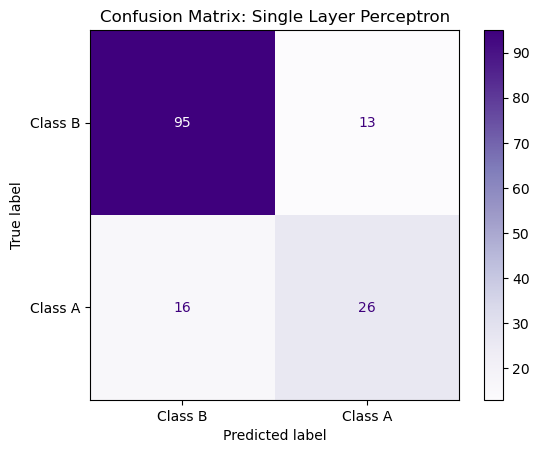

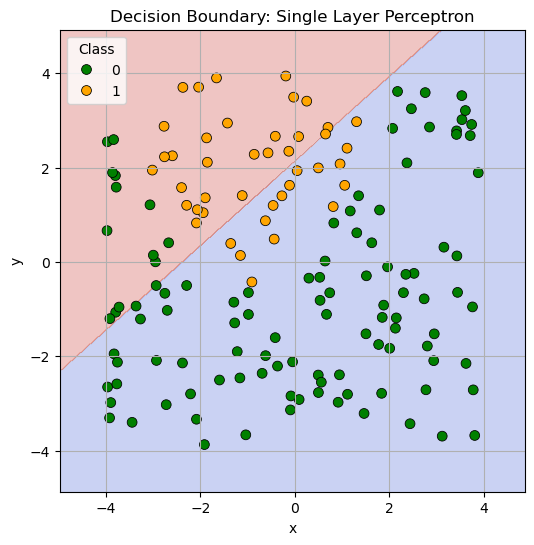

{'Accuracy': 0.8066666666666666,
 'Confusion Matrix': array([[95, 13],
        [16, 26]], dtype=int64)}

In [14]:
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def generate_data(n_points=500, a=0.5, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    return X, labels

# decision boundary for the single layer peceptron model
def plot_decision_boundary(model, X, y, scaler, title="Decision Boundary: Perceptron"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "green", 1: "orange"}, edgecolor="k", s=50)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

# plotting the data distribution with 500 points and a = 0.5
X, y = generate_data(n_points=500, a=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training the Single Layer Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# prediction of the SLP model 
y_pred = perceptron.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

results = {
    "Accuracy": acc,
    "Confusion Matrix": cm
}

# Confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class B", "Class A"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix: Single Layer Perceptron")
plt.grid(False)
plt.show()

plot_decision_boundary(perceptron, X_test, y_test, scaler, title="Decision Boundary: Single Layer Perceptron")

results


Adding the Noise in the data for real world scenarios in SLP

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#genrating the dataset again with mentioning optional class imbalance and Gaussian noise
def generate_data_with_noise(n_points=500, a=0.5, imbalance=False, add_noise=False, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    if add_noise:
        X += np.random.normal(0, 0.3, size=X.shape)  # Add Gaussian noise
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)

    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]

    return X, labels

# evaluating the model 
def evaluate_slp_with_noise(n_points_list, imbalance_list, noise_list):
    results = []

    for n_points in n_points_list:
        for imbalance in imbalance_list:
            for add_noise in noise_list:
                X, y = generate_data_with_noise(n_points=n_points, a=0.5, imbalance=imbalance, add_noise=add_noise, seed=60)
                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

                # features standardization
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # training the perceptron
                model = Perceptron(max_iter=1000, random_state=42)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results.append({
                    "n_points": n_points,
                    "imbalance": imbalance,
                    "noise": add_noise,
                    "accuracy": acc,
                    "true_negatives": cm[0, 0],
                    "false_positives": cm[0, 1],
                    "false_negatives": cm[1, 0],
                    "true_positives": cm[1, 1]
                })

    return pd.DataFrame(results)

n_points_list = [250, 500, 1000]
imbalance_list = [False, True]
noise_list = [False, True]

df_slp_noise_results = evaluate_slp_with_noise(n_points_list, imbalance_list, noise_list)

from IPython.display import display
display(df_slp_noise_results)


,n_points,imbalance,noise,accuracy,true_negatives,false_positives,false_negatives,true_positives
0,250,False,False,0.813333,46,8,6,15
1,250,False,True,0.720000,54,0,21,0
2,250,True,False,0.852459,48,6,3,4
3,250,True,True,0.901639,53,1,5,2
4,500,False,False,0.806667,95,13,16,26
5,500,False,True,0.760000,102,6,30,12
6,500,True,False,0.786885,84,24,2,12
7,500,True,True,0.868852,103,5,11,3
8,1000,False,False,0.780000,163,54,12,71
9,1000,False,True,0.823333,173,44,9,74


Small MLP

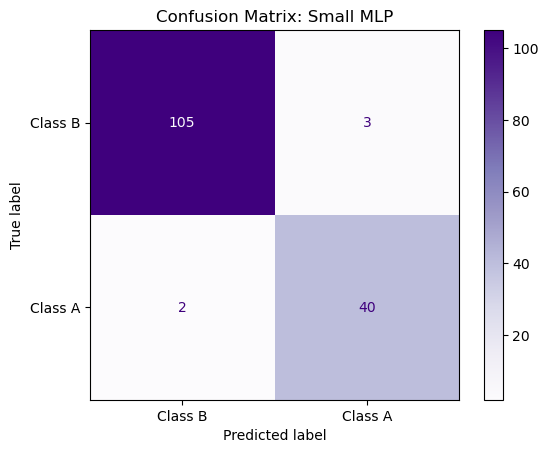

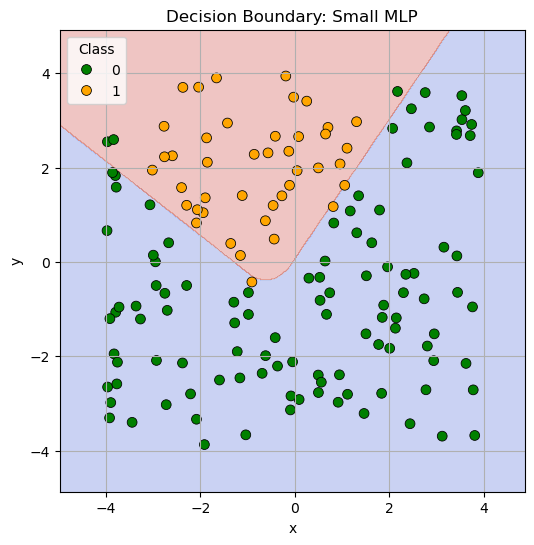

(0.9666666666666667,
 array([[105,   3],
        [  2,  40]], dtype=int64))

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# reusing the data generated for this Small MLP modelling 
def generate_data(n_points=500, a=0.5, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    return X, labels

# Decision boundary plotting
def plot_decision_boundary(model, X, y, scaler, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "green", 1: "orange"}, edgecolor="k", s=50)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend(title="Class")
    plt.show()

# using 500 datapoints and a=0.5
X, y = generate_data(n_points=500, a=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training the small MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam',
                          max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

#evaluation of the small MLP model
y_pred_mlp = mlp_model.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

#plotting the confusion matrix and decision boundary
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["Class B", "Class A"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix: Small MLP")
plt.grid(False)
plt.show()

plot_decision_boundary(mlp_model, X_test, y_test, scaler, title="Decision Boundary: Small MLP")
acc_mlp, cm_mlp


Small MLP model with variations in the curvature parameter

Curvature a = 0.0 Accuracy = 0.993


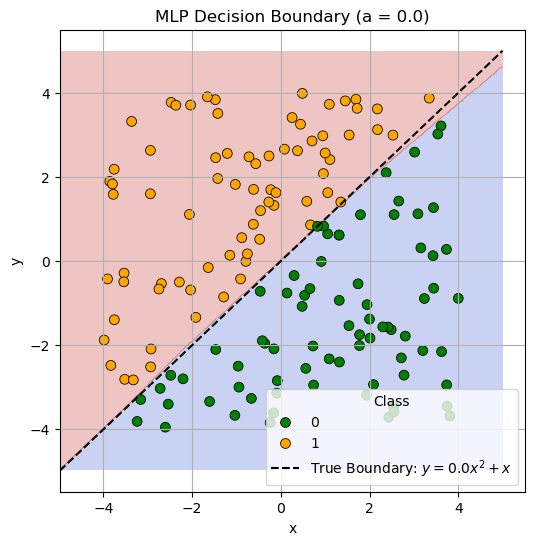

Curvature a = 0.2 Accuracy = 1.000


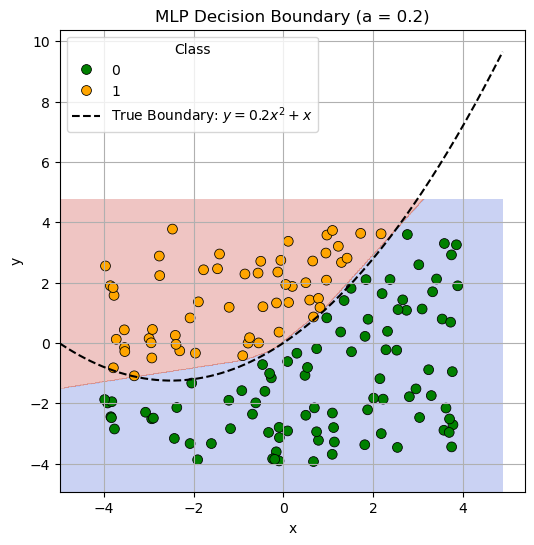

Curvature a = 0.5 Accuracy = 0.967


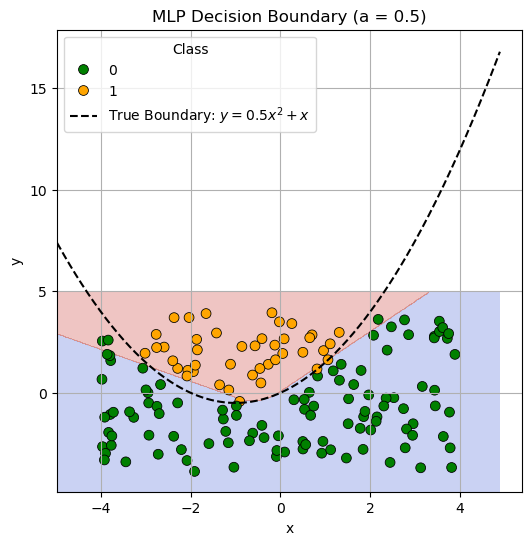

Curvature a = 1.0 Accuracy = 0.967


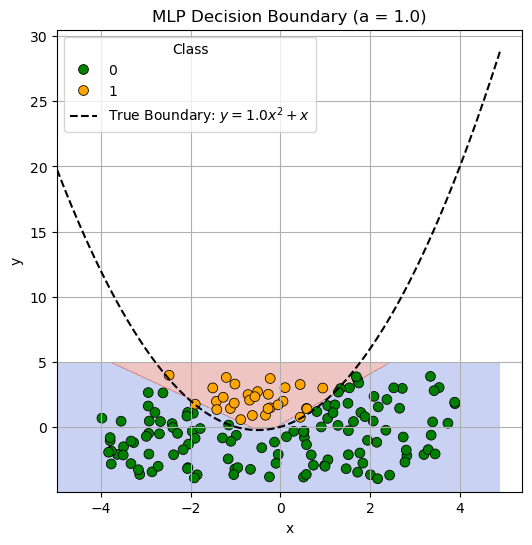

Curvature a = 2.0 Accuracy = 0.987


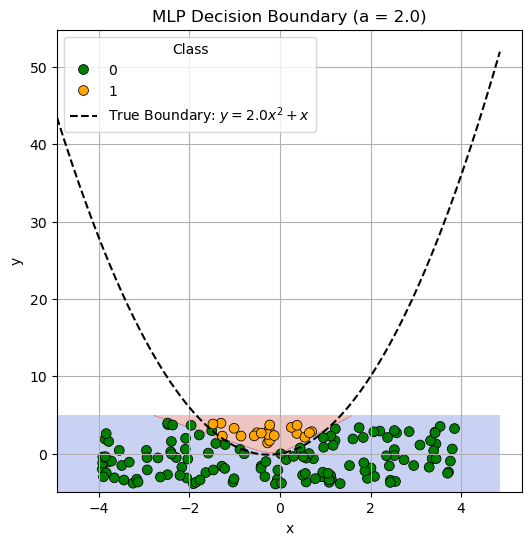

In [20]:
def generate_data(n_points=250, a=0.5, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    return X, labels

def plot_mlp_decision_boundary(model, X, y, scaler, a=None, title="MLP Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette={0: "green", 1: "orange"}, edgecolor="k", s=50)

    if a is not None:
        x_vals = np.linspace(x_min, x_max, 300)
        y_curve = a * x_vals**2 + x_vals
        plt.plot(x_vals, y_curve, '--k', label=f"True Boundary: $y={a}x^2 + x$")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

# Small MLP with ddifferent curvature values
a_values = [0.0, 0.2, 0.5, 1.0, 2.0]
accuracies = []

for a in a_values:
    X, y = generate_data(n_points=500, a=a, seed=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1500, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Curvature a = {a:.1f} Accuracy = {acc:.3f}")
    plot_mlp_decision_boundary(model, X_test, y_test, scaler, a=a, title=f"MLP Decision Boundary (a = {a})")


Small MLP with Imbalance & Noise


In [ ]:
def generate_data_with_noise(n_points=500, a=0.5, imbalance=False, add_noise=False, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    if add_noise:
        X += np.random.normal(0, 0.3, size=X.shape)  # Add Gaussian noise
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)

    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]

    return X, labels

# evaluating the Small MLP model with noise
def evaluate_mlp_with_noise(n_points_list, imbalance_list, noise_list):
    results = []

    for n_points in n_points_list:
        for imbalance in imbalance_list:
            for add_noise in noise_list:
                X, y = generate_data_with_noise(n_points=n_points, a=0.5, imbalance=imbalance, add_noise=add_noise, seed=60)
                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model = MLPClassifier(hidden_layer_sizes=(8,), max_iter=500, random_state=42)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results.append({
                    "n_points": n_points,
                    "imbalance": imbalance,
                    "noise": add_noise,
                    "accuracy": acc,
                    "true_negatives": cm[0, 0],
                    "false_positives": cm[0, 1],
                    "false_negatives": cm[1, 0],
                    "true_positives": cm[1, 1]
                })

    return pd.DataFrame(results)

n_points_list = [250, 500, 1000]
imbalance_list = [False, True]
noise_list = [False, True]

df_mlp_noise_results = evaluate_mlp_with_noise(n_points_list, imbalance_list, noise_list)

from IPython.display import display
display(df_mlp_noise_results)

model = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1500, random_state=42)


,n_points,imbalance,noise,accuracy,true_negatives,false_positives,false_negatives,true_positives
0,250,False,False,0.906667,50,4,3,18
1,250,False,True,0.933333,52,2,3,18
2,250,True,False,0.950820,53,1,2,5
3,250,True,True,0.934426,54,0,4,3
4,500,False,False,0.946667,103,5,3,39
5,500,False,True,0.960000,106,2,4,38
6,500,True,False,0.942623,106,2,5,9
7,500,True,True,0.975410,107,1,2,12
8,1000,False,False,0.973333,211,6,2,81
9,1000,False,True,0.970000,214,3,6,77


Deep MLP

Deep MLP
Accuracy: 0.973
Confusion Matrix:
 [[106   2]
 [  2  40]]


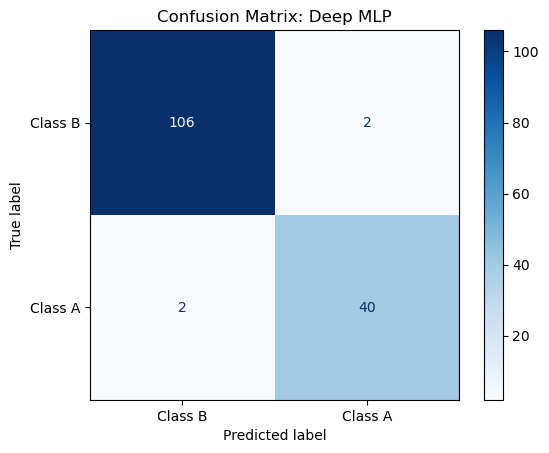

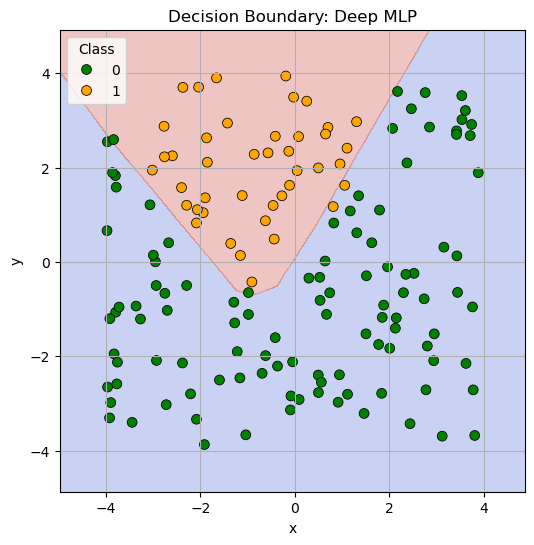

In [25]:
X, y = generate_data(n_points=500, a=0.5, seed=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# defining the Deep MLP model
# Used ReLU activation function and Adam optimizer
deep_mlp = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', solver='adam', max_iter=1000, random_state=42)
deep_mlp.fit(X_train_scaled, y_train)

# predicting an d evaluating using the deep mlp 
y_pred = deep_mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Deep MLP")
print(f"Accuracy: {acc:.3f}")
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class B", "Class A"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Deep MLP")
plt.grid(False)
plt.show()

plot_decision_boundary(deep_mlp, X_test, y_test, scaler, title="Decision Boundary: Deep MLP")

Deep MLP - variations in Curvature Sensitivity parameteer

a = 0.0 → Accuracy = 0.993


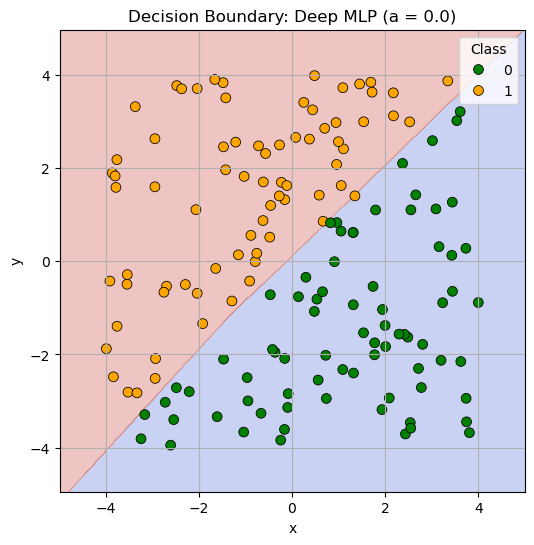

a = 0.2 → Accuracy = 0.987


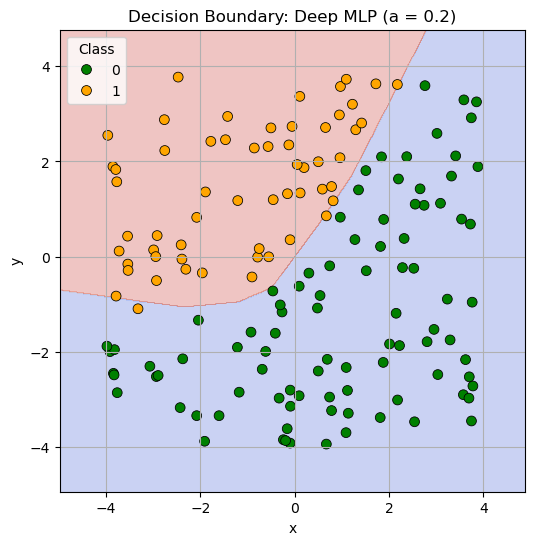

a = 0.5 → Accuracy = 0.973


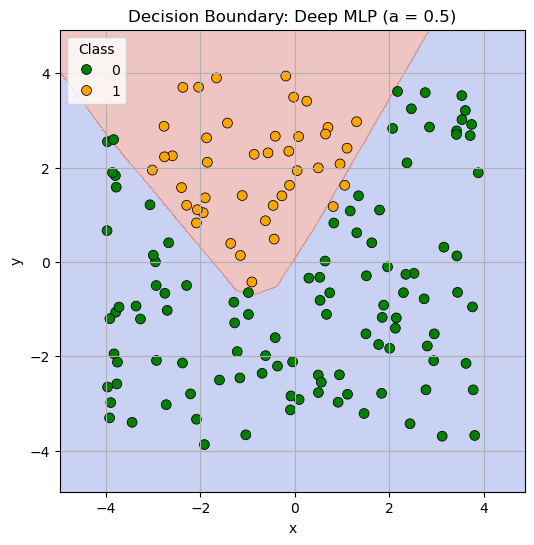

a = 1.0 → Accuracy = 0.980


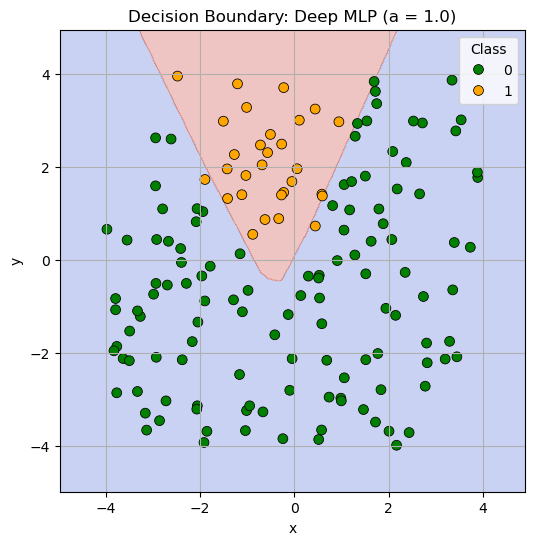

a = 2.0 → Accuracy = 0.987


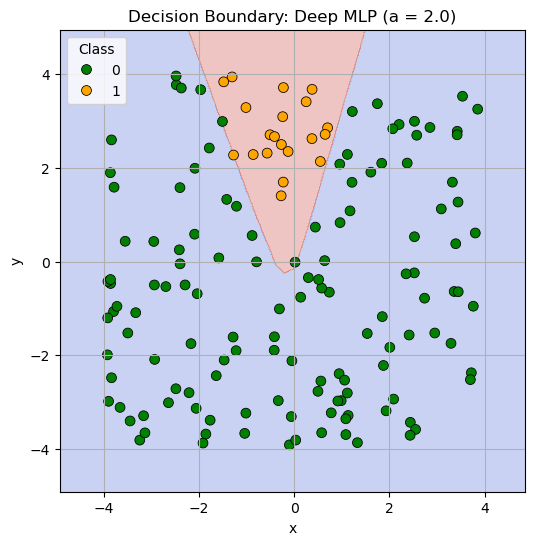

In [26]:
# variations in curvature parameter 
a_values = [0.0, 0.2, 0.5, 1.0, 2.0]
accuracies = []

for a in a_values:
    
    X, y = generate_data(n_points=500, a=a, seed=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # deep MLP model
    deep_mlp = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', solver='adam', max_iter=1000, random_state=42)
    deep_mlp.fit(X_train_scaled, y_train)

    # predicting and evaluating from the model 
    y_pred = deep_mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"a = {a:.1f} → Accuracy = {acc:.3f}")

    plot_decision_boundary(deep_mlp, X_test, y_test, scaler, title=f"Decision Boundary: Deep MLP (a = {a})")


Deep MLP with noise and class imbalance

In [28]:
#Function to add the noise anf class imbalance
def generate_data_with_noise(n_points=500, a=0.5, imbalance=False, add_noise=False, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    if add_noise:
        X += np.random.normal(0, 0.3, size=X.shape)
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)

    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]

    return X, labels
# evaluating function for deep mlp model
def evaluate_deep_mlp_with_noise(n_points_list, imbalance_list, noise_list):
    results = []

    for n_points in n_points_list:
        for imbalance in imbalance_list:
            for add_noise in noise_list:
                X, y = generate_data_with_noise(n_points=n_points, a=0.5, imbalance=imbalance, add_noise=add_noise, seed=60)
                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000, random_state=42)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results.append({
                    "n_points": n_points,
                    "imbalance": imbalance,
                    "noise": add_noise,
                    "accuracy": acc,
                    "true_negatives": cm[0, 0],
                    "false_positives": cm[0, 1],
                    "false_negatives": cm[1, 0],
                    "true_positives": cm[1, 1]
                })

    return pd.DataFrame(results)

n_points_list = [250, 500, 1000]
imbalance_list = [False, True]
noise_list = [False, True]

df_deep_mlp_results = evaluate_deep_mlp_with_noise(n_points_list, imbalance_list, noise_list)

from IPython.display import display
display(df_deep_mlp_results)

,n_points,imbalance,noise,accuracy,true_negatives,false_positives,false_negatives,true_positives
0,250,False,False,0.960000,53,1,2,19
1,250,False,True,0.960000,53,1,2,19
2,250,True,False,0.885246,54,0,7,0
3,250,True,True,0.885246,54,0,7,0
4,500,False,False,0.973333,106,2,2,40
5,500,False,True,0.986667,108,0,2,40
6,500,True,False,0.967213,107,1,3,11
7,500,True,True,0.983607,108,0,2,12
8,1000,False,False,0.983333,214,3,2,81
9,1000,False,True,1.000000,217,0,0,83


Wide MLP

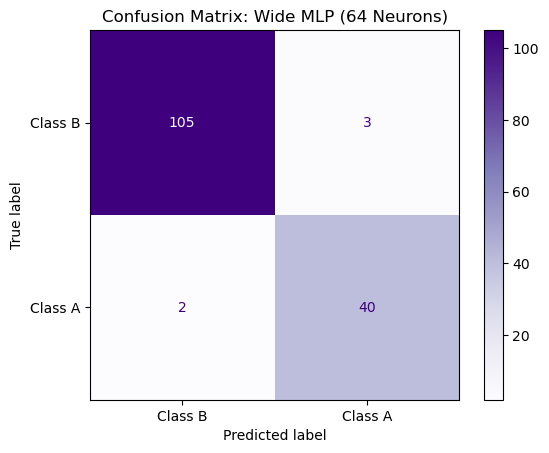

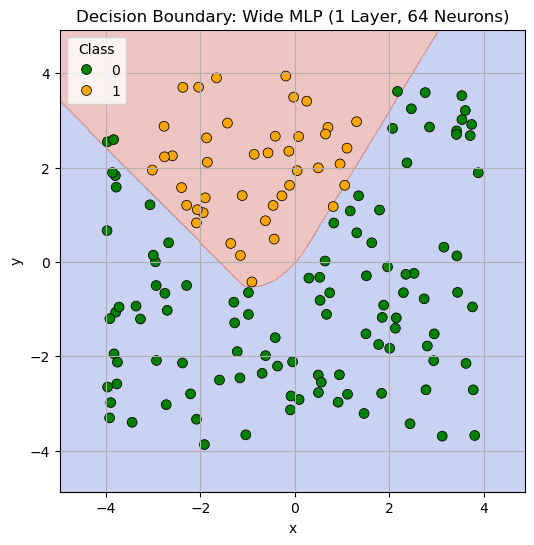

(0.9666666666666667,
 array([[105,   3],
        [  2,  40]], dtype=int64))

In [29]:
# generating the dataset with the decision boundary for the wide MLP model
def generate_data(n_points=500, a=0.5, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    return X, labels

def plot_decision_boundary(model, X, y, scaler, title="Decision Boundary: Wide MLP"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "green", 1: "orange"}, edgecolor="k", s=50)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend(title="Class")
    plt.show()

X, y = generate_data(n_points=500, a=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training the Wide MLP model
wide_mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
wide_mlp.fit(X_train_scaled, y_train)

#evaluating the Wide MLP model
y_pred = wide_mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class B", "Class A"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix: Wide MLP (64 Neurons)")
plt.grid(False)
plt.show()

plot_decision_boundary(wide_mlp, X_test, y_test, scaler, title="Decision Boundary: Wide MLP (1 Layer, 64 Neurons)")
accuracy, cm



Wide MLP with variations in parameter value a

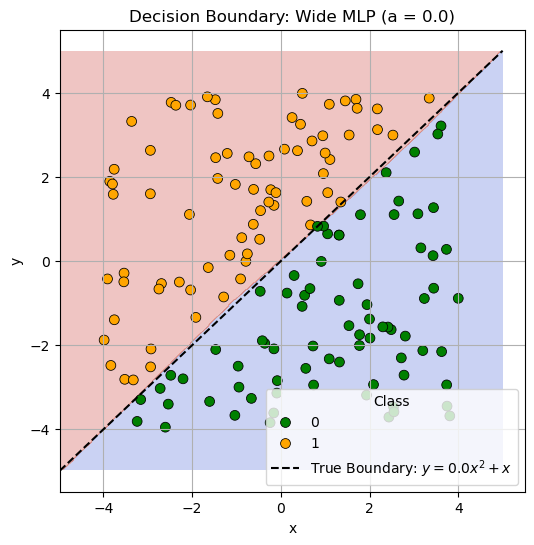

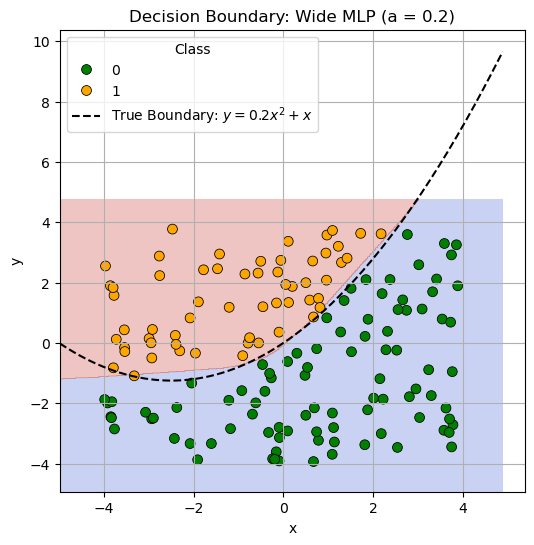

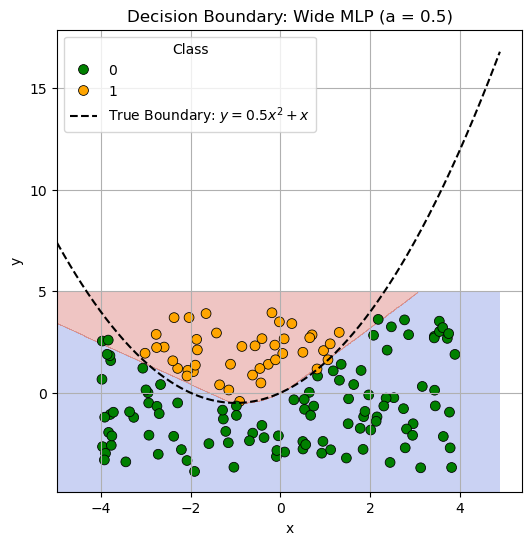

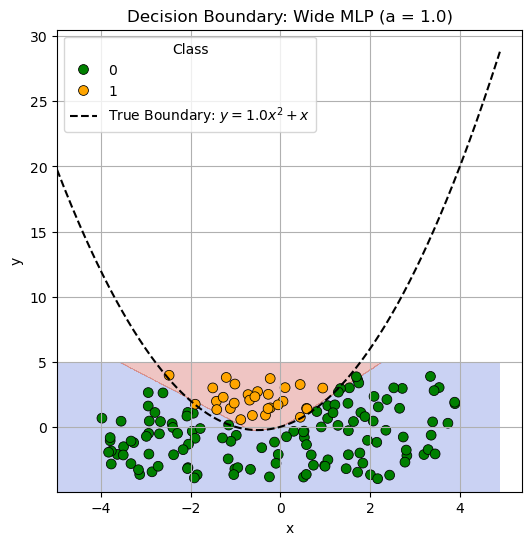

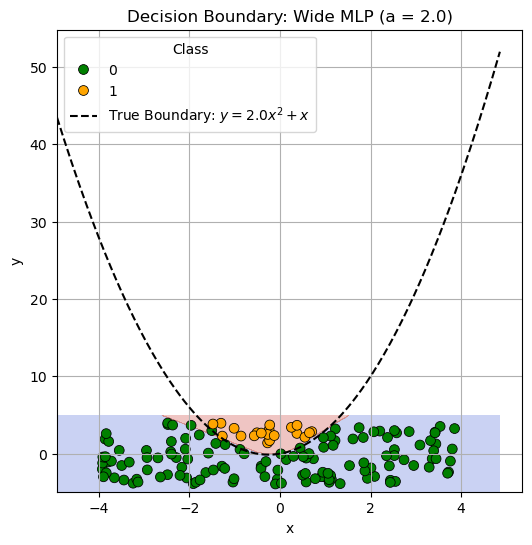

[(0.0, 0.9933333333333333),
 (0.2, 0.9933333333333333),
 (0.5, 0.9666666666666667),
 (1.0, 0.9733333333333334),
 (2.0, 0.9866666666666667)]

In [30]:
def generate_data(n_points=250, a=0.5, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    return X, labels

def plot_decision_boundary_mlp(model, X, y, scaler, a=None, title="MLP Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "green", 1: "orange"}, edgecolor="k", s=50)

    if a is not None:
        x_vals = np.linspace(x_min, x_max, 300)
        y_curve = a * x_vals**2 + x_vals
        plt.plot(x_vals, y_curve, '--k', label=f"True Boundary: $y={a}x^2 + x$")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

a_values = [0.0, 0.2, 0.5, 1.0, 2.0]
accuracies = []

for a in a_values:
    X, y = generate_data(n_points=500, a=a, seed=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((a, acc))
    plot_decision_boundary_mlp(model, X_test, y_test, scaler, a=a, title=f"Decision Boundary: Wide MLP (a = {a})")

accuracies


Wide MLP adding noise and class imbalance for real world scenarios

In [31]:
def generate_data_with_noise(n_points=500, a=0.5, imbalance=False, add_noise=False, seed=60):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 2))
    if add_noise:
        X += np.random.normal(0, 0.3, size=X.shape)
    x_vals, y_vals = X[:, 0], X[:, 1]
    boundary = a * x_vals**2 + x_vals
    labels = (y_vals > boundary).astype(int)
    
    if imbalance:
        class_1_idx = np.where(labels == 1)[0]
        class_0_idx = np.where(labels == 0)[0]
        class_1_idx = np.random.choice(class_1_idx, size=len(class_1_idx)//3, replace=False)
        keep = np.concatenate([class_0_idx, class_1_idx])
        X, labels = X[keep], labels[keep]

    return X, labels

def evaluate_wide_mlp(n_points_list, imbalance_list, noise_list):
    results = []
    for n_points in n_points_list:
        for imbalance in imbalance_list:
            for add_noise in noise_list:
                X, y = generate_data_with_noise(n_points=n_points, a=0.5, imbalance=imbalance, add_noise=add_noise, seed=60)
                X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results.append({
                    "n_points": n_points,
                    "imbalance": imbalance,
                    "noise": add_noise,
                    "accuracy": acc,
                    "true_negatives": cm[0, 0],
                    "false_positives": cm[0, 1],
                    "false_negatives": cm[1, 0],
                    "true_positives": cm[1, 1]
                })

    return pd.DataFrame(results)

n_points_list = [250, 500, 1000]
imbalance_list = [False, True]
noise_list = [False, True]

df_wide_mlp = evaluate_wide_mlp(n_points_list, imbalance_list, noise_list)

from IPython.display import display
display(df_wide_mlp)


,n_points,imbalance,noise,accuracy,true_negatives,false_positives,false_negatives,true_positives
0,250,False,False,0.933333,51,3,2,19
1,250,False,True,0.986667,54,0,1,20
2,250,True,False,0.934426,51,3,1,6
3,250,True,True,0.983607,54,0,1,6
4,500,False,False,0.966667,105,3,2,40
5,500,False,True,0.960000,105,3,3,39
6,500,True,False,0.950820,106,2,4,10
7,500,True,True,0.991803,107,1,0,14
8,1000,False,False,0.986667,214,3,1,82
9,1000,False,True,0.976667,215,2,5,78


Printing a comparison etween all the models

In [37]:
#comparing the models
acc_at_05 = {
    "Logistic Regression": 0.96,  
    "Single Layer Perceptron (SLP)": 0.80,
    "Small MLP": 0.967,
    "Deep MLP": 0.973,
    "Wide MLP": 0.967
}
acc_05_df = pd.DataFrame(
    list(acc_at_05.items()), columns=["Model", "Accuracy at a = 0.5"]
).sort_values(by="Accuracy at a = 0.5", ascending=False).reset_index(drop=True)

# Display
print("Accuracy at a = 0.5 (Curved Decision Boundary)")
display(acc_05_df)


Accuracy at a = 0.5 (Curved Decision Boundary)


,Model,Accuracy at a = 0.5
0,Deep MLP,0.973
1,Small MLP,0.967
2,Wide MLP,0.967
3,Logistic Regression,0.960
4,Single Layer Perceptron (SLP),0.800


In [34]:
# Average accuracy across all the 12 scenarios with noise and imbalance
average_accuracies = {
    "Logistic Regression": df_results["accuracy"].mean(),
    "Single Layer Perceptron (SLP)": df_slp_noise_results["accuracy"].mean(),
    "Small MLP (8)": df_mlp_noise_results["accuracy"].mean(),
    "Deep MLP (8→4)": df_deep_mlp_results["accuracy"].mean(),
    "Wide MLP (64)": df_wide_mlp["accuracy"].mean(),
}
average_accuracy_df = pd.DataFrame(
    list(average_accuracies.items()), columns=["Model", "Average Accuracy"]
).sort_values(by="Average Accuracy", ascending=False).reset_index(drop=True)

from IPython.display import display
print("Average Accuracy Across All Scenarios")
display(average_accuracy_df)

Average Accuracy Across All Scenarios


,Model,Average Accuracy
0,Logistic Regression,0.981874
1,Wide MLP (64),0.966772
2,Deep MLP (8→4),0.961646
3,Small MLP (8),0.951311
4,Single Layer Perceptron (SLP),0.818955


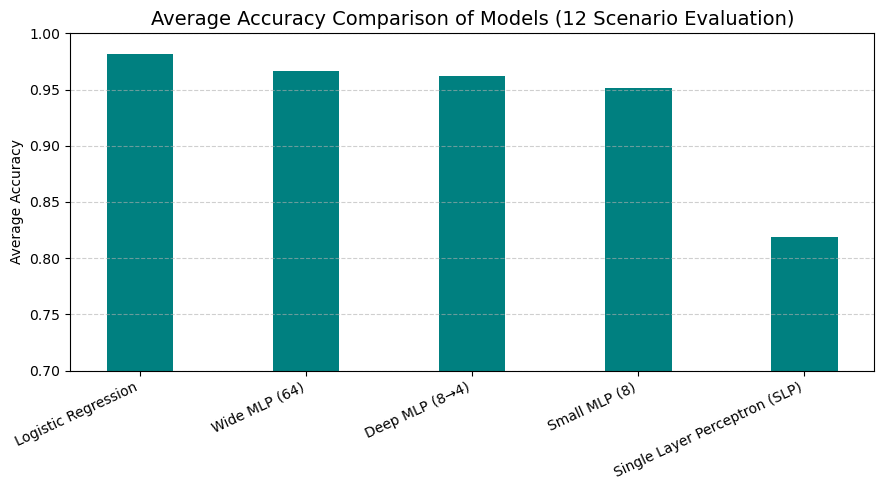

In [35]:
# Plotting the average accuracy as a bar chart
plt.figure(figsize=(9, 5))
bar_width = 0.4
plt.bar(average_accuracy_df["Model"], average_accuracy_df["Average Accuracy"], width=bar_width, color='teal')
plt.title("Average Accuracy Comparison of Models (12 Scenario Evaluation)", fontsize=14)
plt.ylabel("Average Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=25, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()